# Predicting the Absolute Distance from Package

## Getting Started

We begin by installing `fastai` and importing the `fastai.vision.all` module. This is used for all of the different comuter vision tasks that fastai supports.

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

Let's take a look at what we're working with. (Note `!` is used to execute a terminal command from within a notebook).

In [3]:
!ls

data		 network	    README.md			  unreal_envs
Data_Collection  predictDist.ipynb  requirements.txt
environment.yml  Presentation	    retrieve_initial_position.py


In [4]:
!ls data

package_predict


In [6]:
!ls data/package_predict

2020-11-23-23-14-13  2020-11-23-23-15-57  2020-11-23-23-17-48
2020-11-23-23-14-27  2020-11-23-23-16-26  2020-11-23-23-18-23
2020-11-23-23-14-52  2020-11-23-23-16-54  2020-11-23-23-19-03
2020-11-23-23-15-28  2020-11-23-23-17-23


In [15]:
!ls data/package_predict/2020-11-23-23-14-13/

airsim_rec.txt	images


In [11]:
!head data/package_predict/2020-11-23-23-14-13/airsim_rec.txt

TimeStamp	POS_X	POS_Y	POS_Z	Q_W	Q_X	Q_Y	Q_Z	ImageFile
1606202053214	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053205911600.png
1606202053322	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053312997500.png
1606202053431	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053419866900.png
1606202053530	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053523039800.png
1606202053644	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053633622100.png
1606202053785	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053776449500.png
1606202053890	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053883729200.png
1606202053999	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388519	0.420045	img__0_1606202053992677300.png
1606202054108	0.311021	0.563801	-1.997677	0.790120	0.219833	-0.388

In [32]:
!ls data/package_predict/2020-11-23-23-14-13/images | wc -l

35


In [33]:
!ls data/package_predict/2020-11-23-23-14-27/images | wc -l

174


As we can see, there are varying amounts of images in each directory. We want as much data as we can get, so we'll need to combine all of the directories of images into one.

## Fixing Data Hierarchy

We'll start by making a new directory for the aggregated data.

In [17]:
path = Path('.')

In [18]:
path.ls()

(#14) [Path('README.md'),Path('.gitattributes'),Path('.ipynb_checkpoints'),Path('retrieve_initial_position.py'),Path('predictDist.ipynb'),Path('data'),Path('Data_Collection'),Path('.gitignore'),Path('requirements.txt'),Path('.git')...]

In [20]:
agg_dir = Path(path/'all_data')

In [22]:
(agg_dir/'images').mkdir(parents=True, exist_ok=True)

In [24]:
agg_dir.ls()

(#1) [Path('all_data/images')]

Next, we will move all of the images into our new directory.

In [30]:
((path/'data/package_predict').ls()[0]/'images').ls()

(#159) [Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202308598541300.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202312813182600.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202318496300800.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202311737620800.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202313901484100.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202315404096600.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202304282807400.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202317647181900.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202316479577000.png'),Path('data/package_predict/2020-11-23-23-18-23/images/img__0_1606202309471741400.png')...]

In [34]:
num_images = 0
for d in (path/'data/package_predict').ls():
    num_images += len((d/'images').ls())
num_images

1369

In [35]:
for d in (path/'data/package_predict').ls():
    for image_path in (d/'images').ls():
        name = image_path.name
        im = PILImage.create(image_path)
        im.save(agg_dir/'images'/name)

In [36]:
(agg_dir/'images').ls()

(#1369) [Path('all_data/images/img__0_1606202138586280800.png'),Path('all_data/images/img__0_1606202106455034700.png'),Path('all_data/images/img__0_1606202078134058900.png'),Path('all_data/images/img__0_1606202106132742200.png'),Path('all_data/images/img__0_1606202159752873400.png'),Path('all_data/images/img__0_1606202229463984800.png'),Path('all_data/images/img__0_1606202080784364600.png'),Path('all_data/images/img__0_1606202167733170000.png'),Path('all_data/images/img__0_1606202308598541300.png'),Path('all_data/images/img__0_1606202162267375700.png')...]

As we can see, we have 1369 images in our new directory, meaning we have successfully moved all of our images over. Now, we'll create an aggregated text file that contains all of the labels for all of the images.

In [38]:
with open((agg_dir/'labels.txt'), 'w') as outfile:
    first = True
    for d in (path/'data/package_predict').ls():
        with open((d/'airsim_rec.txt'), 'r') as infile:
            if first:
                outfile.write(infile.readline())
                first = False
            else:
                infile.readline()
            for line in infile.readlines():
                outfile.write(line)

In [41]:
!head all_data/labels.txt

TimeStamp	POS_X	POS_Y	POS_Z	Q_W	Q_X	Q_Y	Q_Z	ImageFile
1606202303650	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202303642765300.png
1606202303754	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202303746943000.png
1606202303868	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202303859033500.png
1606202303970	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202303962775200.png
1606202304082	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202304074793300.png
1606202304185	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202304177964000.png
1606202304290	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202304282807400.png
1606202304400	2.477045	1.528197	-0.093510	-0.000014	-0.026166	0.008695	-0.999620	img__0_1606202304392407800.png
1606202304505	2.477045	1.528197	-0.093510	-0.00001

In [42]:
!cat all_data/labels.txt | wc -l

1370


We have successfully put all of the labels into a single file. We will now put each label into a dictionary for easy access later.

In [48]:
np.linalg.norm([3,4,0], ord=None)

5.0

In [67]:
package_coor = np.array([1.2, -1.5, 0], dtype=np.float32)
label_dict = {}
with open((agg_dir/'labels.txt'), 'r') as in_file:
    in_file.readline()
    for line in in_file.readlines():
        line_list = line.split()
        img_file = line_list[-1]
        drone_coor = np.array(line_list[1:4], dtype=np.float32)
        label_dict[img_file] = np.linalg.norm(drone_coor - package_coor)

In [68]:
len(label_dict)

1369

In [73]:
min_dist = min(label_dict.values())
max_dist = max(label_dict.values())
min_dist, max_dist

(1.9209373, 4.8195305)

## Creating the Model

First, we'll create a label function that gets the label for a given image from our dictionary.

In [56]:
def get_lbl(fname):
    return label_dict[fname.name]

Fastai uses `DataBlock`s as a nice way to prepare the data for the model, apply data augmentation, split into valid and training data, and more.

In [70]:
db = DataBlock(
        blocks=(ImageBlock, RegressionBlock(n_out=1)),
        get_items=get_image_files,
        get_y=get_lbl,
        splitter=RandomSplitter(valid_pct=0.2, seed=47),
        item_tfms=Resize(224),
        batch_tfms=aug_transforms()
        )
dls = db.dataloaders((agg_dir/'images'))

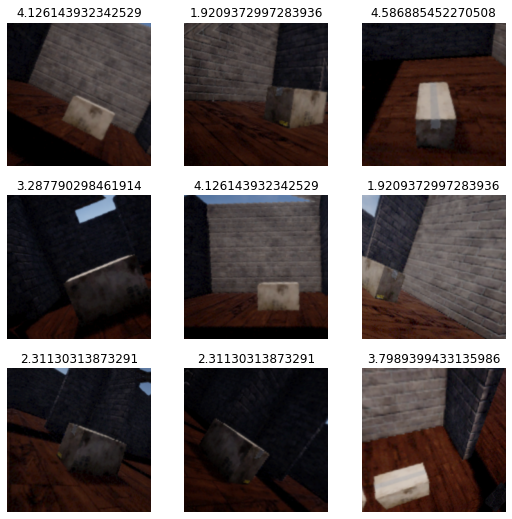

In [71]:
dls.show_batch()

As we can see from a batch in our `DataLoaders`, we have the images and their corresponding labels.

In [78]:
learn = cnn_learner(dls, resnet34, y_range=(int(min_dist)+.5, int(max_dist)+1.0),
                   wd=0.1, metrics=mse)
learn.fine_tune(40)

epoch,train_loss,valid_loss,mse,time
0,1.608203,1.544060,1.544060,00:03


epoch,train_loss,valid_loss,mse,time
0,0.672735,2.030611,2.030611,00:03
1,0.613923,2.628696,2.628696,00:03
2,0.579554,2.271940,2.271940,00:03
3,0.545252,2.231011,2.231011,00:03
4,0.521413,1.977688,1.977688,00:03
5,0.496759,1.550691,1.550691,00:03
6,0.458498,1.239767,1.239767,00:03
7,0.417377,1.649211,1.649211,00:03
8,0.384529,2.044579,2.044579,00:03
9,0.344567,0.772883,0.772883,00:03


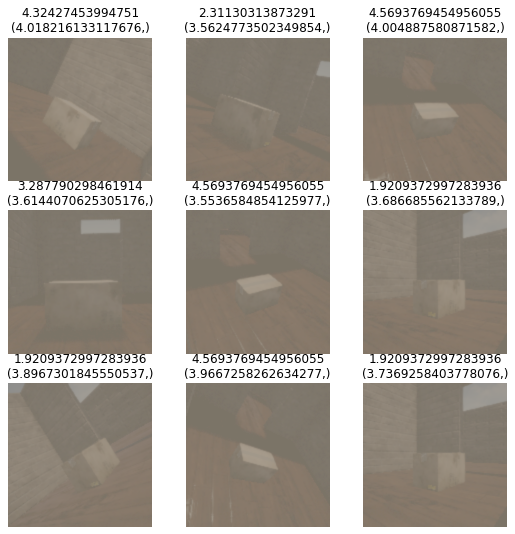

In [81]:
learn.show_results()

We got down to 0.75 validation loss/mse and the predictions look fairly close accurate overall.